# Laboratorio di Simulazione Numerica

## Esercitazione 11

Lo scopo di questa esercitazione è quello di approcciare le tecniche machine learning e di iniziare ad utilizzare librerie di python come Keras e TensorFlow. Queste saranno utilizzate per eseguire fit di punti campionati secondo precise distribuzioni ma soggetti a un "rumore" gaussiano di fondo, che possono rappresentare i risultati di misure fisiche provenienti da un determinato modello ma affette da errore sperimentale.

### Esercizio 11.1

Lo scopo di questo primo esercizio è di eseguire un fit di una funzione lineare uni-dimensionale. I punti saranno campionati secondo la funzione:

$$
f(x) = 2x + 1
$$

per $x \in [-1, +1]$ e soggetti ad un rumore gaussiano a media nulla e a deviazione standard $\sigma$.

La rete neurale che esegue il compito è già stata fornita in laboratorio ed è composta da un solo neurone, in quanto esso riceve in input un dato $x$, lo moltiplica per un peso $w$ e gli aggiunge un bias $b$. Dunque, è in grado di descrivere bene un modello del tipo $y = wx + b$. Lo scopo dell'esercizio è quindi quello di modificare i parametri della rete, in particolare il numero di dati per il training, il numero di epoche nelle quali si esegue il training e il rumore $\sigma$, per verificare come cambia l'apprendimento della rete. 

Di seguito mostriamo i risultati della rete neurale servendoci di tre grafici: un primo grafico che mostri la funzione che vogliamo fittare e i dati di validazione su cui vogliamo testare la rete, un secondo che mostri le performance della rete attraverso l'andamento del mean square error all'aumentare del numero di epoche su cui eseguiamo il training, ed un terzo ed ultimo grafico che mostra la predizione della rete neurale sui dati di validazione.

#### Prima prova 

A lezione si è visto come, con un numero di dati di training $n_{train}$ pari a $500$, e con un numero di epoche $n_{epochs} = 30$, la rete non fosse in grado di fornire un buon fit della funzione. Proviamo quindi, in prima battuta, ad aumentare la dimensione dei dati di training. Inoltre, segnaliamo che, come regola generale, il numero di dati su cui si esegue la validazione $n_{valid}$ sarà sempre $1/10$ del numeri di dati di training. Questi punti di validazione saranno diversi da quelli su cui si esegue il training della rete in quanto lo scopo del machine learning è quello di addestrare la nostra rete neurale a fittare dati qualsiasi, non solo quelli forniti nel dataset di training. 

Per valutare la capacità della rete neurale di fare buone previsioni, siamo inoltre interessati all'andamento del **mean square error**, ossia della differenza quadratica fra il valore predetto dalla nostra rete neurale e quello atteso dalla distribuzione che stiamo cercando di fittare. Questo test, dopo aver allenato la rete neurale sul data set di training, viene eseguito sia sui punti di validazione che su quelli di training.

- **trainig data = 1000**;
- **validation data = 100**
- **numero epoche = 30**
- **$\sigma = 0.2$**

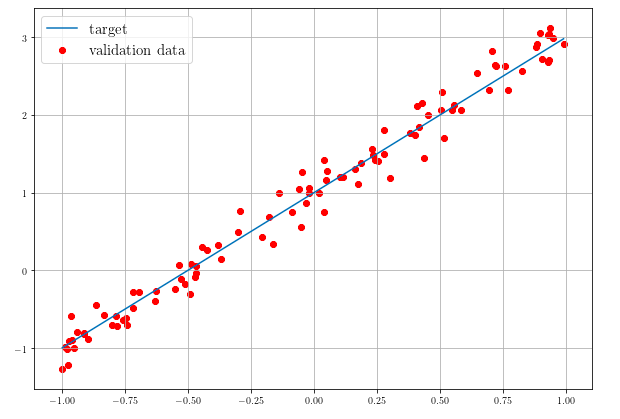
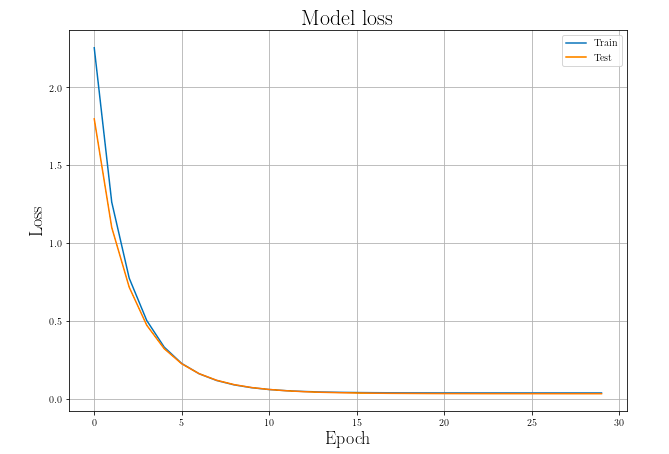
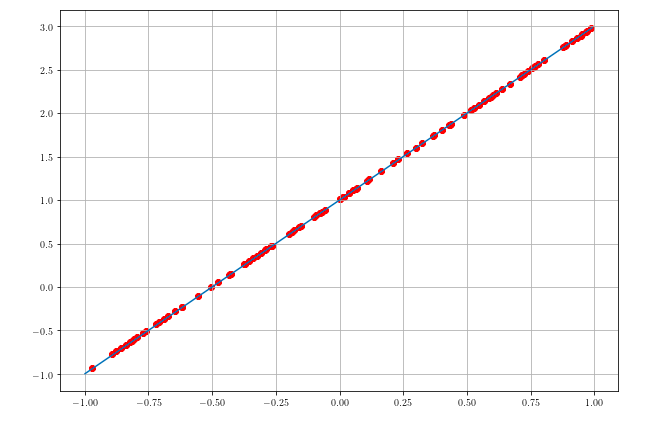

**Parametri del fit** $ f(x) = mx + b$ : 

$ m = 1.9965111 $

$ b = 1.0036982 $

Come si può vedere, aumentare il numero di dati del training rende la rete neurale in grado di eseguire un ottimo fit del modello.

#### Seconda prova

Proviamo ora ad raddoppiare il numero di epoche del training.

- **trainig data = 500**;
- **validation data = 50**
- **numero epoche = 60**
- **$\sigma = 0.2$**

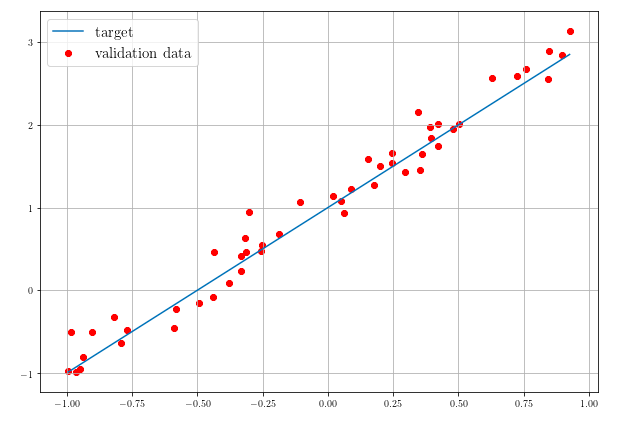
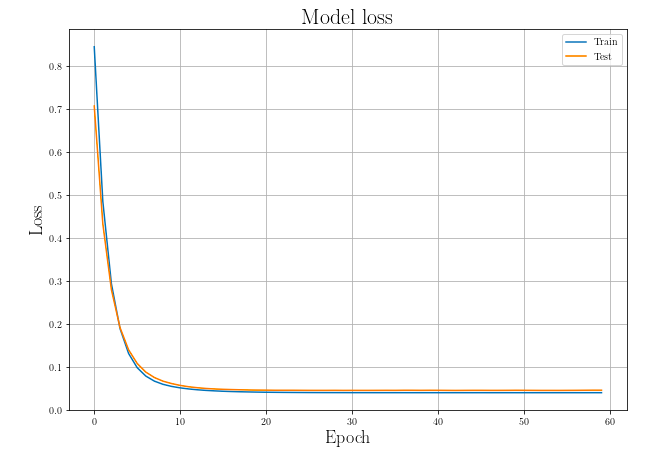
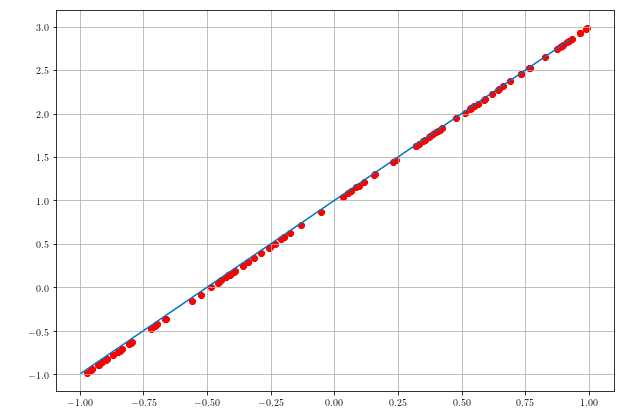

**Parametri del fit** $ f(x) = mx + b$ : 

$ m = 2.0205216 $

$ b = 0.9791566 $

Anche in questo caso, aumentare il numero di epoche di training fa ottenere ottimi risultati predittivi alla rete.

#### Terza prova

Proviamo infine a testare il comportamento della rete neurale quando forniamo dati soggetti ad un forte rumore gaussiano. In questo caso, per ottenere un buon fit, aumentiamo il numero di epoche.

- **trainig data = 500**;
- **validation data = 50**
- **numero epoche = 60**
- **$\sigma = 0.6$**

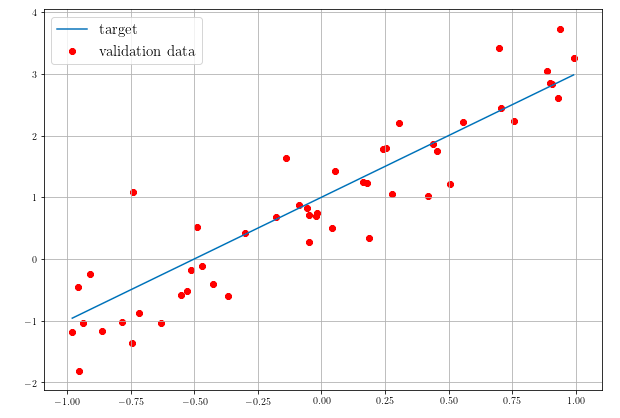
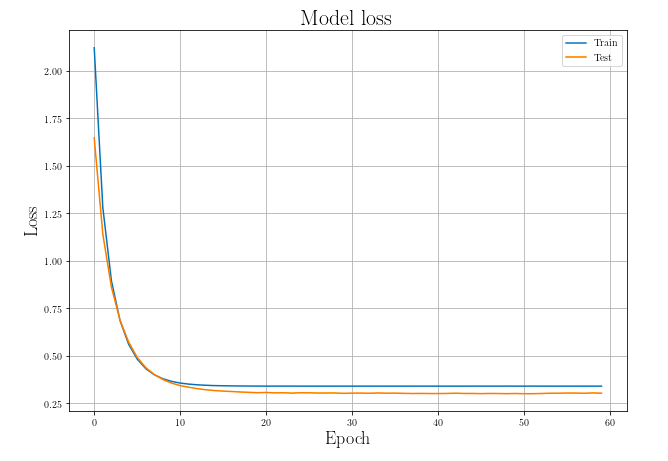
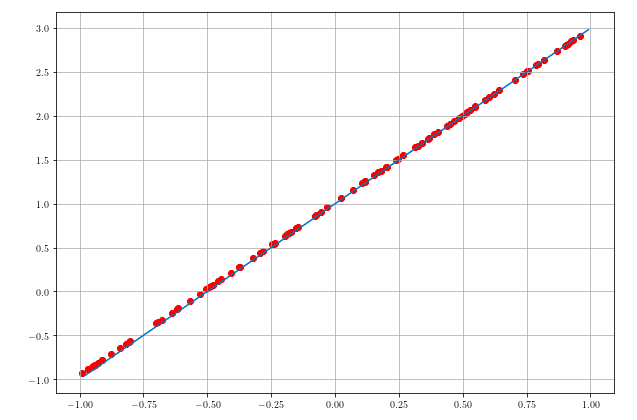

**Parametri del fit** $ f(x) = mx + b$ : 

$ m = 2.0079048 $

$ b = 1.0058917 $

In generale vediamo che aumentando il numero di epoche o il numero di dati su cui si esegue il training il modello è in grado di fare previsioni più accurate. Tuttavia notiamo che, per questo particolare problema, aumentare il numero di dati di training è la scelta che produce risultati più accurati. Di questo ci si può convincere facilmente guardando i risultati del fit del primo caso e confrontandoli con la seconda e terza prova. 

### Esercizio 11.2

Lo scopo di questo esercizio è di usare tecniche di machine learning per eseguire fit di dati distribuiti secondo una funzione sempre unidimensionale, ma più complessa. In particolare vogliamo applicarle al polinomio di terzo grado:

$$
f(x)=4-3x-2x^2+3x^3
$$

per $x \in [-1,1]$.

Sicuramente in questo caso avremo bisogno di una rete neurale più elaborata, che contenga per lo meno due neuroni. Tentiamo di eseguire il fit con reti neurali costruite in modo diverso ed analizziamo i risultati. In particolare siamo interessati a mostrare un primo plot con la funzione target e i dati affetti da rumore gaussiano su cui eseguiamo il training, un grafico che mostri l'andameto dell'errore all'aumentare del numero di epoche, e un grafico che mostri la predizione finale del modello fatta sui dati di validazione. Inoltre, siamo interessati a vedere il comportamento della rete su punti di validazione generati al di fuori dell'intervallo $[-1,1]$ su cui è stato eseguito il training.

#### Primo tentativo

Iniziamo con una rete formata da un unico layer con un grande numero di neuroni. Essa avrà una struttura del tipo 1, 80, 1. I parametri del training sono i seguenti:

- $\sigma = 0.2$;
- 80 epoche;
- 5000 punti di training e 500 punti di validazione;

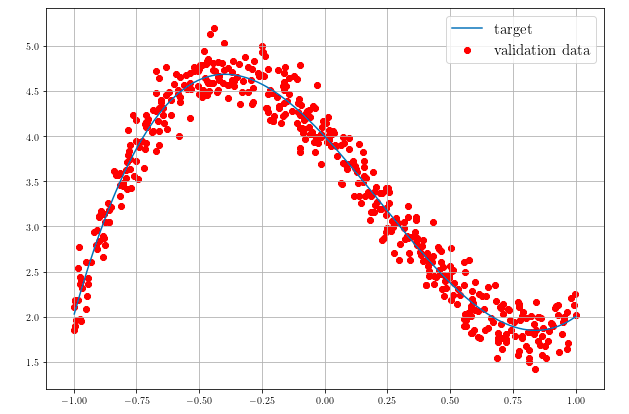
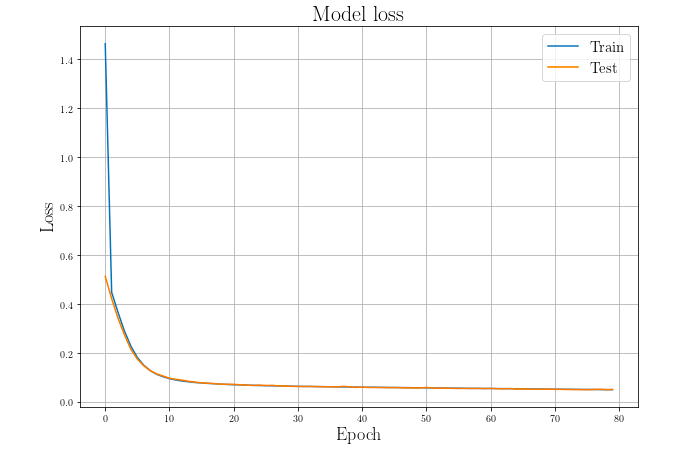
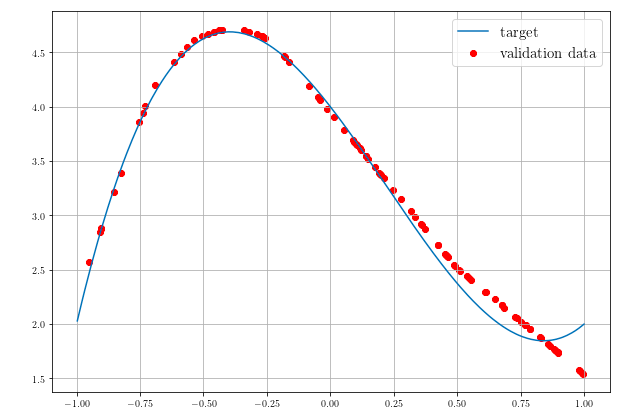
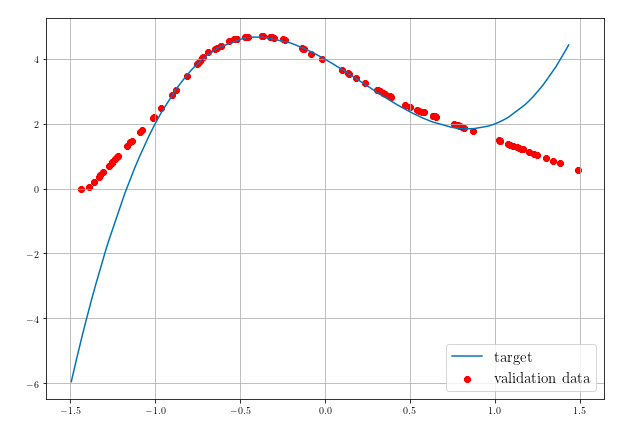

La rete neurale produce buoni risultati all'interno dell'intervallo del training, anche se nella metà di destra $[0, +1]$ la rete predice un andamento lineare che non rappresenta bene il modello. Tuttavia si segnala che, anche dopo 80 epoche di training, il modello raggiunge una test loss pari a $\simeq 0.043$, di poco superiore a quella attesa $\sigma^2 = 0.04$ dovuta a $\sigma = 0.2$. La convergenza alla test loss attesa è molto lenta, il che è indice di inefficienza da parte della rete. Inoltre, come si può facilmente vedere, quando si esce dall'intervallo $[-1, +1]$ il fit non è attendibile.

#### Secondo tentativo

Proviamo ora con una rete neurale a più strati ma con meno neuroni. Usiamo 3 layer con neuroni così distribuiti: 1, 12, 10, 8, 1. I parametri della simulazione sono i seguenti:

- $\sigma = 0.2$;
- 80 epoche;
- 5000 punti di training e 500 punti di validazione;

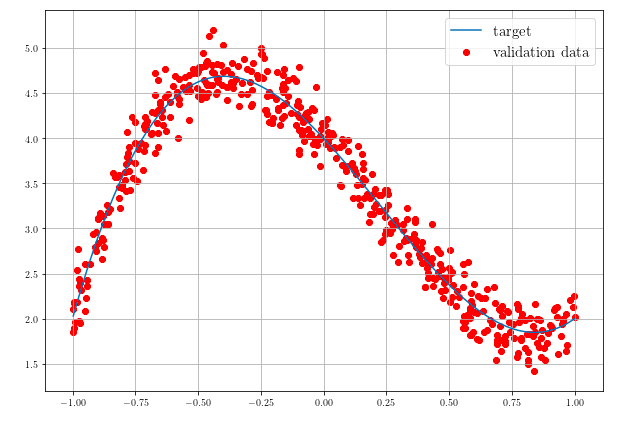
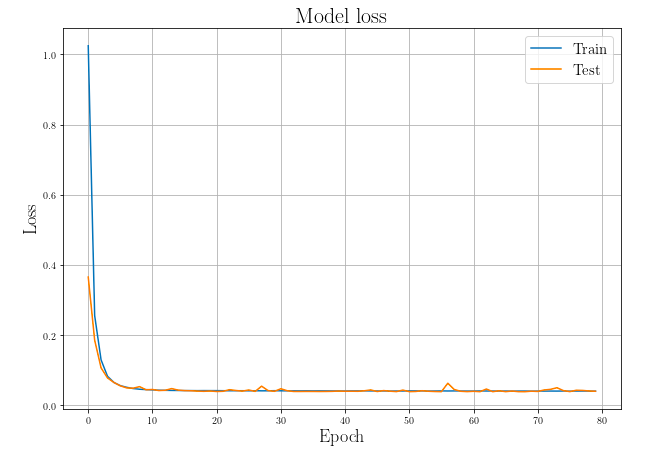
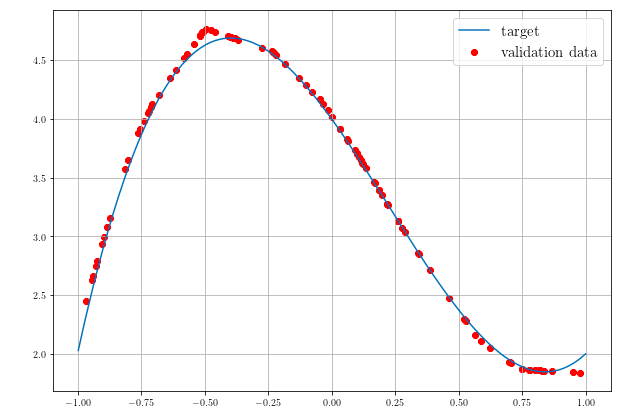
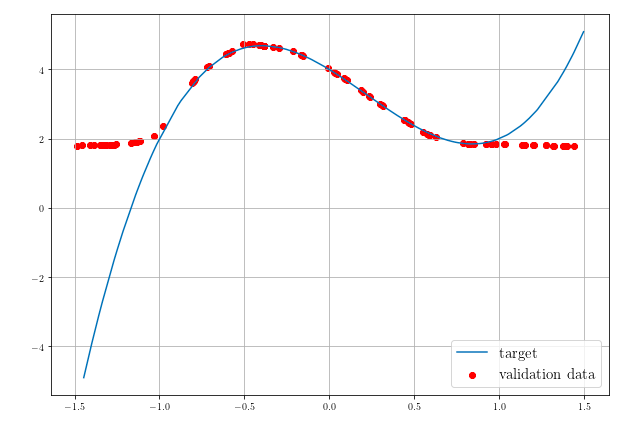

Anche in questo caso il risultato del fit è abbastanza buono, sebbene i punti nell'intorno di $-0.50$ si discostino abbastanza dai valori di target. La test loss è di 0.0405, ed è raggiunta dopo poche epoche (circa 20), segnale che questo tipo di configurazione è molto più efficiente e performante rispetto alla prima. Anche in questo caso, fuori da $[-1, 1]$ il fit non prodice buoni risultati.

#### Terzo tentativo

Come ultimo tentativo proviamo ad aumentare la complessità della rete, aggiungendo altri strati. Utilizziamo 5 layer con neuroni così distribuiti: 1, 8, 7, 7, 6, 6, 1. Proviamo inoltre a fittare dati molto rumorosi aumentando il valore di $\sigma$. I parametri del training sono i seguenti:

- $\sigma = 0.5$;
- 80 epoche;
- 10000 punti di training e 1000 punti di validazione;

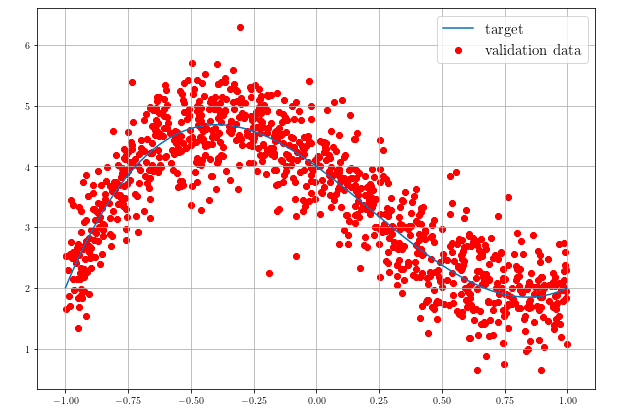
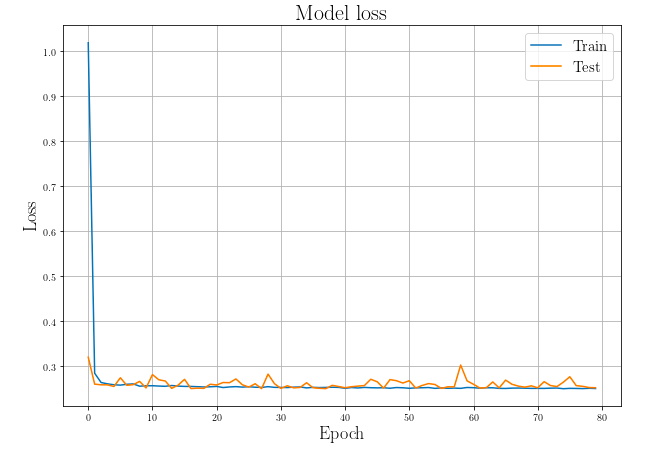
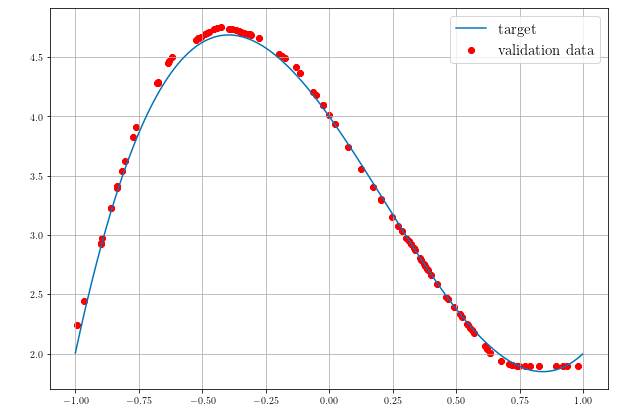
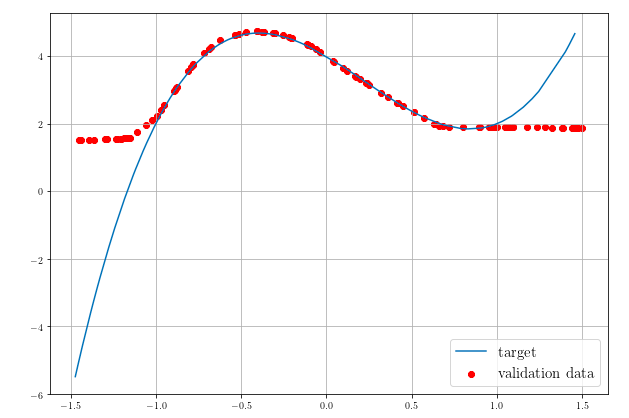

Il fit è buono anche in questo caso, sebbene si segnala un discostamento dei punti rispetto ai valori attesi in un intorno di $-0.40$. La test loss è pari a 0.252, estremamente vicina al valore atteso di $\sigma^2 = 0.25$, e la rete converge a questo valore pressochè immediatamente. Anche in quest'ultimo caso il fit non è attendibile fuori dall'intervallo di training.

Una considerazione generale che si può fare su tutte e tre le configurazioni è che in generale i punti vicini all'estrmo di destra $x = +1$ non sono fittati bene dalla rete neurale. Questo è dovuto al fatto che la derivata della funzione cambia segno in questo intorno e la rete neurale, a causa del rumore gaussiano che affligge i dati di training, predice un andamento piatto. 

### Esercizio 11.3

In quest'ultimo esercizio si richiede di applicare le tecniche di machine learning viste negli esercizi precedenti per fittare una funzione scalare a due variabili:

$$
f(x, y) = sin(x^2 + y^2)
$$

per $x \in [-1.5, +1.5]$ e $y \in [-1.5, +1.5]$.

Chiaramente, quest'ultimo caso sarà più difficile a livello di codice dei precedenti due, in quanto i dati di input su cui eseguire il training e la validazione del modello dovranno includere sia le $x$ che le $y$. Pertanto, le variabili di input x_train e x_valid sono state convertite in matrici la cui prima riga rappresenta i valori di $x$ e la seconda quelli di $y$. Una volta fatta questa modifica, è possibile recuperare il codice della rete neurale utilizzato finora. 

Per eseguire il fit, si è utilizzata una rete neurale a tre strati i con neuroni così distribuiti: 1, 40, 35, 30, 1.
Per il training sono stati utilizzati $20000$ dati di training e $2000$ punti di validazione con rumore gaussiano a media nulla e $\sigma = 0.2$, e si sono utilizzate 60 epoche. Di seguito si riporta un plot iniziale dei dati di validazione, il plot dell'andamento dell'errore quadratico al variare delle epoche e il plot della predizione finale alla fine del training. Inoltre alla fine si è fatto un grafico della differenza fra i valori predetti e quelli di target, per stimare la bontà del fit.

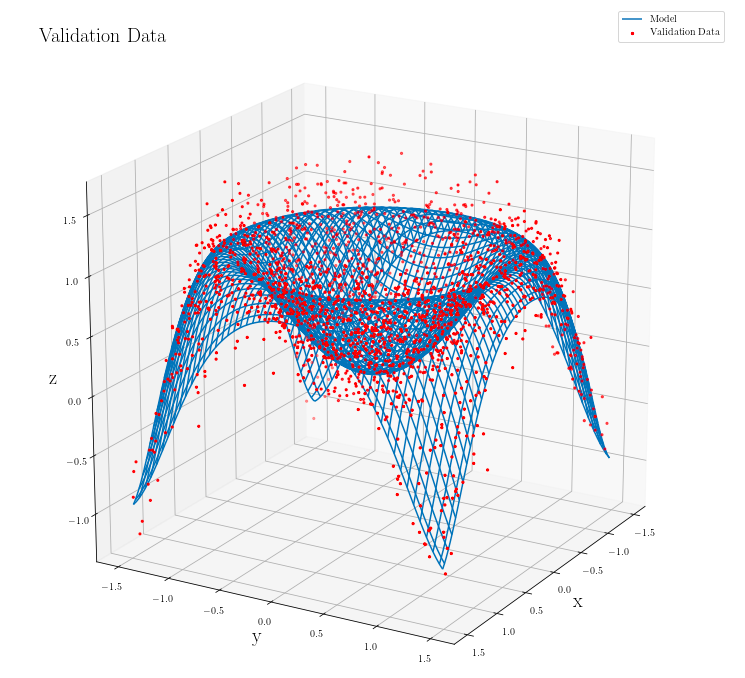
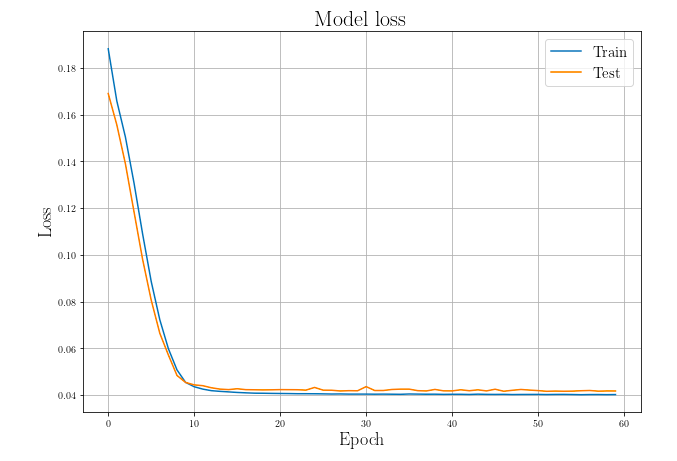
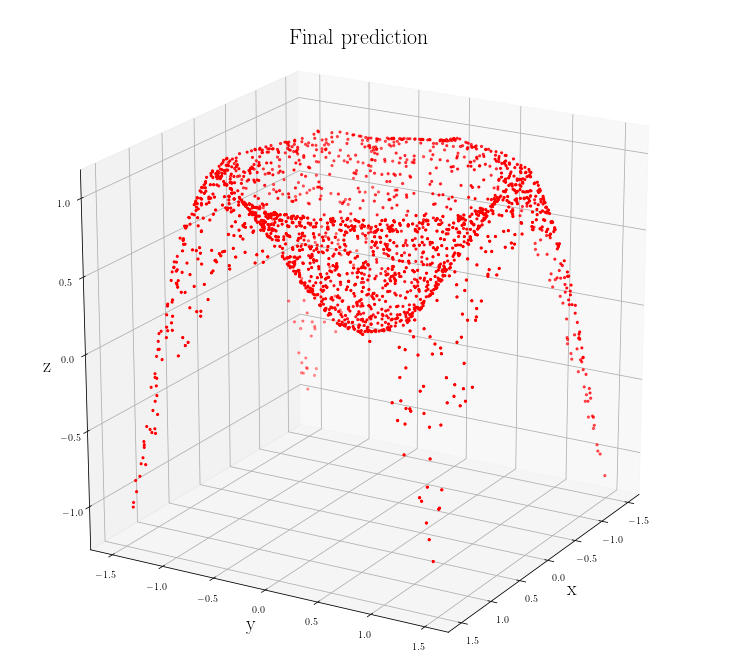
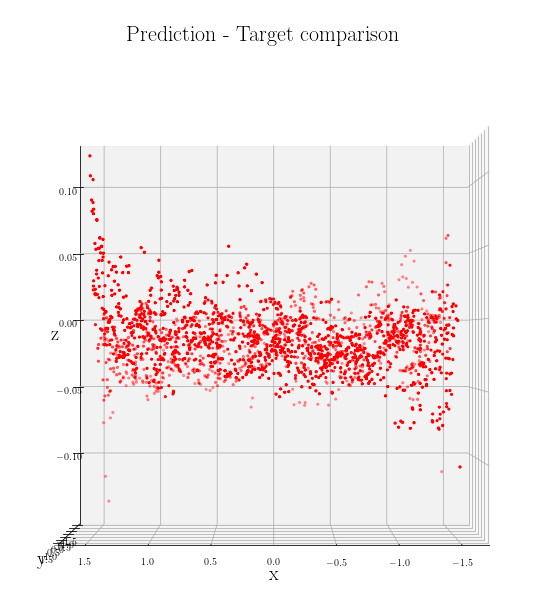

Come si può vedere, la rete neurale riesce ad eseguire il fit in maniera piuttosto precisa. In particolare dall'ultimo grafico si vede che in generale il valore predetto dalla rete si discosta da quello di target entro lo $0.10$. Le zone agli estremi del quadrato nel piano $(x, y)$ di lato $3/2$ sono evidentemente quelle in cui il fit è peggiore, a causa del cambio di segno della derivata e dei pochi punti di training campionati in questi intorni.

Infine, la test loss finale è di 0.041, estremamente vicino al valore atteso di $\sigma^2 \simeq 0.04$, compatibile con il valore di $\sigma = 0.2$ dei dati di training. La convergenza è piuttosto lenta all'inizio, ma viene comunque raggiunta intorno alla trentesima epoca.